[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Humboldt-WI/bads/blob/master/exercises/3_ex_predictive_analytics.ipynb) 

# BADS Exercise 3 on the foundations of predictive analytics
The following exercise tasks revisit some concepts covered in [Tutorial 3 on predictive analytics](https://github.com/Humboldt-WI/bads/blob/master/tutorials/3_nb_predictive_analytics.ipynb) 
Much of the tutorial focused on linear regression. Let's revisit some standard practices in regression analysis. For the fun of it, we will consider another data set. Specifically, we will use a well-known data set associated with wine quality. The data set is available in the *UCI machine learning repository* at: https://archive.ics.uci.edu/ml/datasets/wine+quality. Spend a few minutes to familiarize yourself with the data. In a nutshell, wine quality is measured on a scale from 0 (basically toxic) to 10 (heaven in a glass) by means of a survey. Note that the survey used other labels. We take the liberty to describe the data in a more figurative way ;) 
The data also provides some feature values capturing various (e.g., chemical) characteristics of the wine. The feature  names are fairly self-explanatory. The goal is to understand how the characteristics determine perceived quality (i.e, the target variable. Strictly speaking, the scaling level of the target variable is ordinal and not numeric. However, for simplicity, we consider our task to be a regression task and use linear regression.  

## 1 Loading the data 
Load and take a look into the data. Print out the number of observations and examine descriptive statistics. Do you see any specific patters? Besides analyzing features individually by calculating descriptive statistics, also pay attention to the correlation between features and the target variable. Depending how advanced you are in your studies, can could also make use of some of the topics that we cover in [Tutorial 4 on data preparation](https://github.com/Humboldt-WI/bads/blob/master/tutorials/4_nb_data_preparation.ipynb). 

In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
# Some configuration of the plots I will create later
%matplotlib inline  
plt.rcParams["figure.figsize"] = (12,6)

In [4]:
# Load the data (either from disk or directly from the web)
file = '/Users/aubrey/Documents/GitHub/BADs/data/winequality-red.csv'
df = pd.read_csv(file,sep=';')
df
#help(pd.read_csv)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
# Create descriptive statistics and state your findings

# Query some properties of the data
print('Dimensionality of the data is {}'.format(df.shape))  # .shape returns a tupel
print('The data set has {} cases.'.format(df.shape[0]))     # I can also index the elements of that tupel
print('The total number of elements is {}.'.format(df.size))

df.info()
#there is no non-null data, and I could adjust the type later
#except for the category quality, others are numeric

Dimensionality of the data is (1599, 12)
The data set has 1599 cases.
The total number of elements is 19188.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
# Produce summary statistics (to R-programmers: this is equivalent to the famous R function summary())
df.describe()
#the mean of quality is about 5.6, and the quality is between 3 and 8
#the variances of free sulfur dioxide, total sulfur dioxide and alcohol are relatively large

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


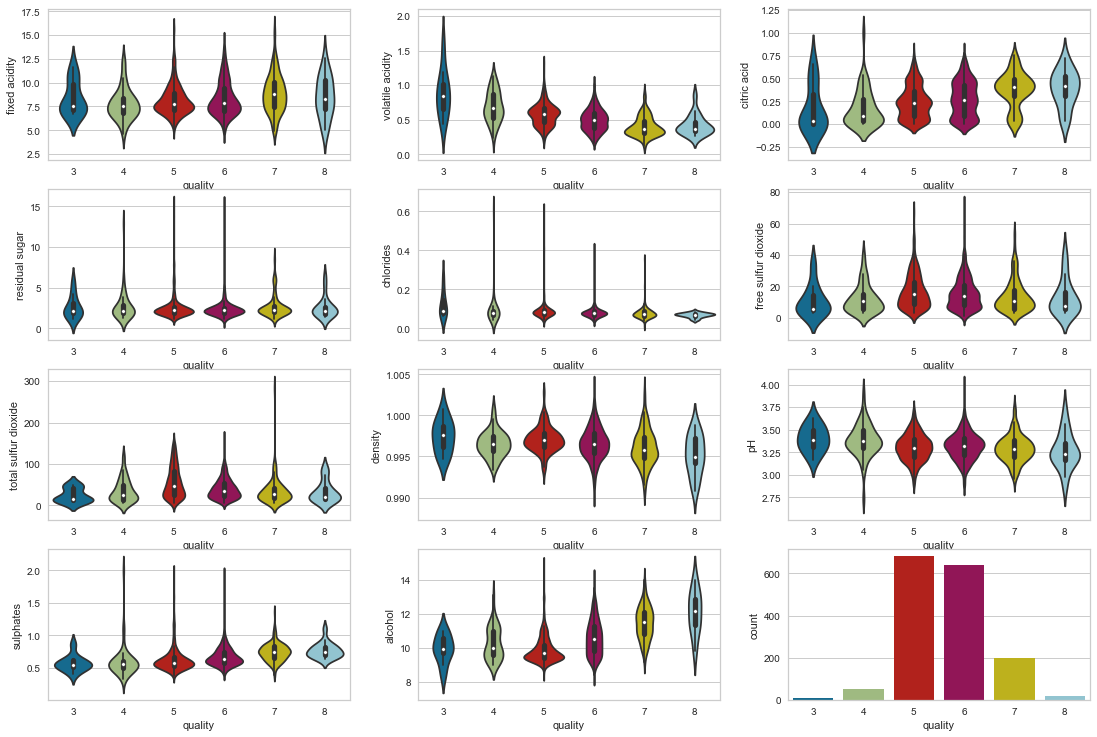

In [7]:
fig, axs = plt.subplots(4,3, figsize=(15, 10))
plt.tight_layout(pad=0.5, w_pad=4, h_pad=1.0)  
x = df.quality

sns.violinplot(x=x, y="fixed acidity",  data=df,ax=axs[0,0])
sns.violinplot(x=x, y="volatile acidity", data=df,ax=axs[0,1])
sns.violinplot(x=x, y="citric acid", data=df,ax=axs[0,2])
sns.violinplot(x=x, y="residual sugar", data=df,ax=axs[1,0])
sns.violinplot(x=x, y="chlorides", data=df,ax=axs[1,1])
sns.violinplot(x=x, y="free sulfur dioxide", data=df,ax=axs[1,2])
sns.violinplot(x=x, y="total sulfur dioxide", data=df,ax=axs[2,0])
sns.violinplot(x=x, y="density", data=df,ax=axs[2,1])
sns.violinplot(x=x, y="pH", data=df,ax=axs[2,2])
sns.violinplot(x=x, y="sulphates", data=df,ax=axs[3,0])
sns.violinplot(x=x, y="alcohol", data=df,ax=axs[3,1])
sns.countplot(x=df.quality, data=df,ax=axs[3,2])

#conjecture: the factors with large influence on quality are volatile acidity, citric acid,
#chlorides, density, ph, sulphates, alcohol

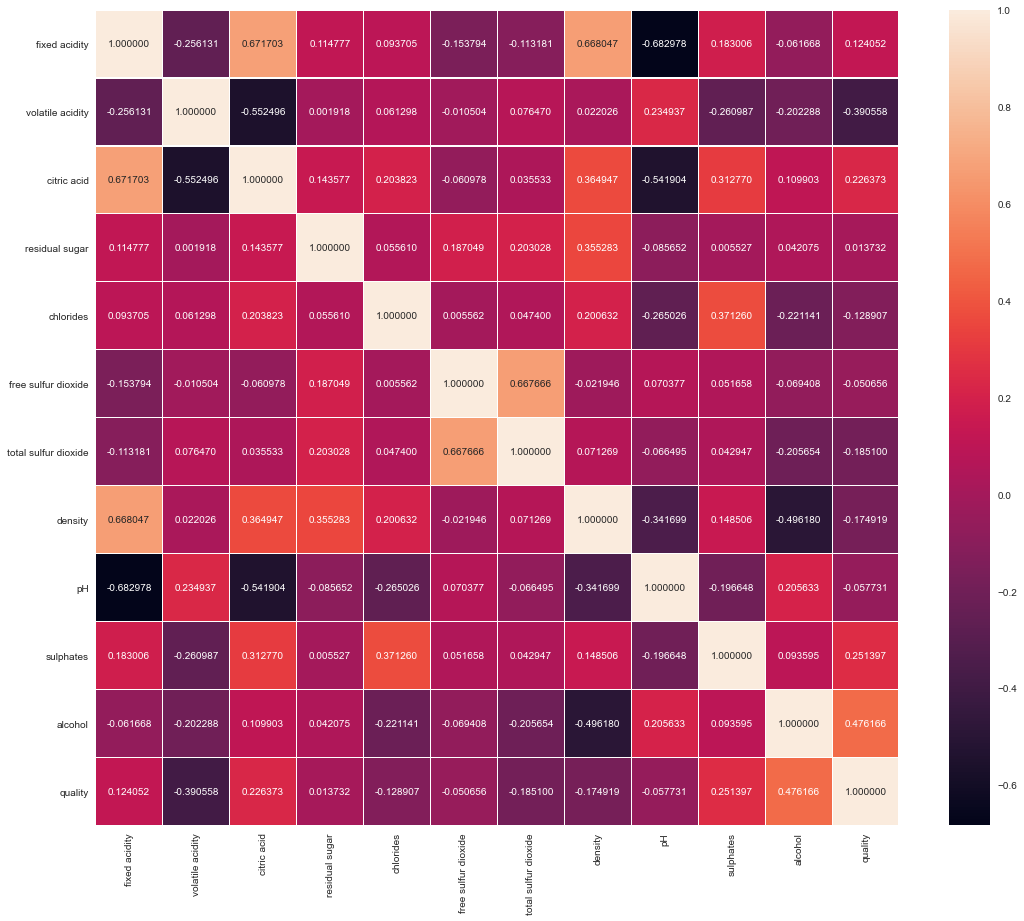

In [8]:
# Analyze the correlation between features and the target
corr= df.corr()
f,ax = plt.subplots(figsize=(18, 15))
sns.heatmap(corr ,annot=True,linewidth=.5,fmt='1f');

#analysis:
#1. from the correlation I know ph and fixed acidity, citric acid are highly negatively correlated, but from above
#   conjecture I infer that fixed acidity may not be one of the regressors, whereas ph and citric acid may be.
#   Therefore, I infer that not both ph and citric acid are the regressors

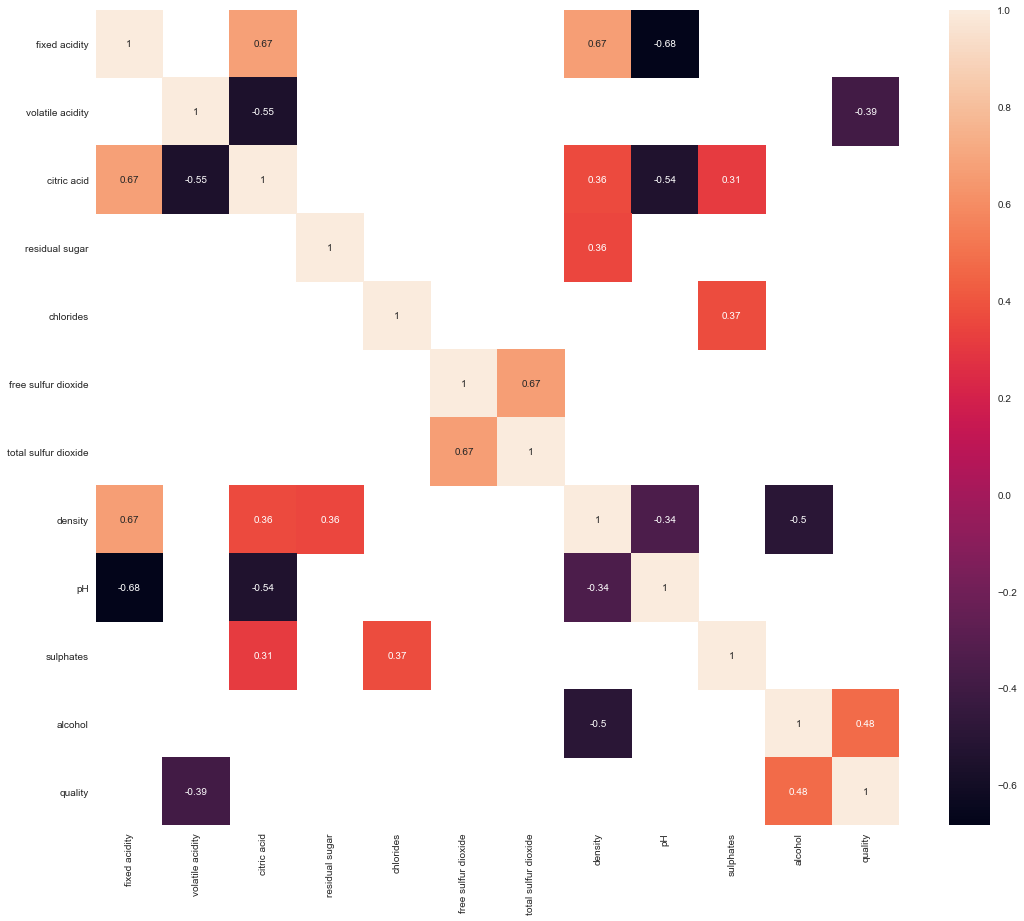

In [9]:
f,ax = plt.subplots(figsize=(18, 15))
sns.heatmap(corr[(corr >= 0.30) | (corr <= -0.30)],
            annot=True);

#if I set the thredshold of rou=0.3, then I could infer that only volatile acidity and alcohol effect quality

## 2 Regression analysis (basic)
Let's try to model the quality of wine (target)  using the data about it's chemical compounds (features). Build a simple linear regression using the `statsmodels` library. Start only with two components that seem to have most influence. You should have got some ideas which variables might be important from your previous analysis of the data. Produce a regression table and discuss the results. How well does your model explain the target?



In [10]:
import statsmodels.api as sm
#help(sm.OLS)

# I forget to add a constant
#(如果去除了常数项，就等于强制认定当所有解释变量为0时，被解释变量为0。如果这个断定不符合实际意义，
#而你执意去除常数项的话，你的线性估计将是有偏的。)


In [33]:
# First regression using only two features
features_tuned = ['alcohol'] 
model = sm.OLS(df.quality, sm.add_constant(df[features_tuned]))

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     468.3
Date:                Tue, 08 Dec 2020   Prob (F-statistic):           2.83e-91
Time:                        10:55:39   Log-Likelihood:                -1721.1
No. Observations:                1599   AIC:                             3446.
Df Residuals:                    1597   BIC:                             3457.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8750      0.175     10.732      0.0

In [34]:
#from above I could see that 
#1. the adjusted r-squared is low, which means that this model explain 22.6% target
#2. f-statistic is small and the prob(f-statistic) is nearly 0, which means this regression is valid
#3. p-value of each coefficient is both nearly 0, which means the coefficient are significantly valid
#4. the mean square error is a common measure to compare algorithm's success and here it is very small
results.mse_resid

0.5046151891350406

## 3 Full regression analysis 
Let's now  try to use all our features. Re-run the regression and check whether its results have improved. Which features seem to play major role? Do you observe any irrelevant features? Did it match the guess we made after looking at correlation? Why could that be? Try out a few more variants of your regression model by discarding less informative features.  

In [35]:


# Codes for tasks 3.3

model_total = sm.OLS(df.quality, sm.add_constant(df.select_dtypes(np.float64)) )

results_total = model_total.fit()

print(results_total.summary())

#1. volatile acidity and alcohol still significantly valid
#2. adjusted r-squared improve 0.3% (just a little)
#3. there is multicollinearity in the model
#4. chlorides, total sulfur dioxide, density, ph and sulphates also affect target
#5. total sulfur dioxide is out of my expect

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Tue, 08 Dec 2020   Prob (F-statistic):          1.79e-145
Time:                        10:56:26   Log-Likelihood:                -1569.1
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1587   BIC:                             3227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   21.9652 

In [36]:
results_total.mse_resid
#smaller than the model before

0.4199185257637248

In [37]:
features_tuned2 = ['volatile acidity','alcohol','chlorides','total sulfur dioxide','pH','sulphates','free sulfur dioxide']
model2 = sm.OLS(df.quality, sm.add_constant(df[features_tuned2]))

results2 = model2.fit()

print(results2.summary())

#Adj. R-squared is still 98.7%

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     127.6
Date:                Tue, 08 Dec 2020   Prob (F-statistic):          5.32e-149
Time:                        10:57:13   Log-Likelihood:                -1570.5
No. Observations:                1599   AIC:                             3157.
Df Residuals:                    1591   BIC:                             3200.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.4301 

In [38]:
results2.mse_resid
##smaller than the model with only two variables

0.41957074736378136

## 4 Comparing regression models
Working on the previous tasks, you have created several regression models for the same data set. You would want to know which model is best for your data. Briefly state which regression statistics you consider to determine the most suitable model. Use this task as an opportunity for verifying that you are familiar with the statistics that the regression output table provides.  

Briefly state your answers to 3.4 as a bullet list:
- My model is "quality = -1.0395*volatile acidity + 0.2943*alcohol - 1.9948*chlorides -
  0.0024* total sulfur dioxide+ 4.2274*density - 0.4207*pH + 0.8813*sulphates"
- It explain 98.7% the target (adjusted R-squared)
- There might be strong multicollinearity or other numerical problems
- F-statistic is small and the prob(f-statistic) is nearly 0, which means this regression model is significantly valid
- P-value of each coefficient is both nearly 0, which means the coefficient are significantly valid
- The mean square error is a common measure to compare algorithm's success and here it is very small(0.42)
- AIC and BIC are both the smallest one comparing to the other models

In [50]:
#Well, our last change has increased the  𝑅2  a little bit but decreased the AIC.
#When judging whether the removal of the insignificant variables has improved the model, 
#recall that more parsimonious models are preferable. Therefore, essentially the same quality
#of fit but using less variables, the second model is better than the former one with all variables included.

#You will have seen some warning messages generated by the statsmodels when fitting the above regression model.
#We might still have problems with multicollinearity. Feel very free to go on and tune our regression model further.

In [51]:
#We were able to explain more of the target variable with the full regression model
#However, adding more variables will always lead to an improved prediction, eventhough there is not an actual relationship between the feature and target variable
#Chosing only highly siginificant variables, we still achieved a similar R-sqaured value
#The correlation analysed at the beginning can be seen in the β values of the regression analysis, e.g. both sulphates and alcohol are positive

## 5 Residual analysis
Having discussed the suitability of alternative regression models above, you will now be ready to pick your preferred model. Create a residual plot for this model. Briefly discuss the purposes of a residual plot and your findings.

In [40]:
# Residual plot

# use our estimates to predict y
y_pred = results2.predict(sm.add_constant(df[features_tuned2]))
print(y_pred)

0       5.024869
1       5.125617
2       5.198310
3       5.694475
4       5.024869
          ...   
1594    5.534544
1595    5.980451
1596    5.961822
1597    5.489273
1598    6.054757
Length: 1599, dtype: float64


In [41]:
# calculate the residuals

e = df.quality-y_pred
print(e)


0      -0.024869
1      -0.125617
2      -0.198310
3       0.305525
4      -0.024869
          ...   
1594   -0.534544
1595    0.019549
1596    0.038178
1597   -0.489273
1598   -0.054757
Length: 1599, dtype: float64


In [42]:
results2.resid 
#same as above

0      -0.024869
1      -0.125617
2      -0.198310
3       0.305525
4      -0.024869
          ...   
1594   -0.534544
1595    0.019549
1596    0.038178
1597   -0.489273
1598   -0.054757
Length: 1599, dtype: float64

In [43]:
# these residuals
print("Mean (sd) of the residuals are {}({})".format(e.mean(), e.std()))

Mean (sd) of the residuals are -5.41183386062434e-15(0.6463225417272641)


In [44]:
#from the solutions: For plotting, we typically use the standardized residulas, 
# ie standardized to have zero mean and unit variance
e_s = results2.resid_pearson

# Let's verify these residuals are standardized
print("Mean (sd) of the standardized residuals are {}({})".format(e_s.mean(), e_s.std()))

Mean (sd) of the standardized residuals are -8.409644324115008e-15(0.9974952997611836)


In [45]:
y_pred.value_counts()

5.741843    4
5.374806    4
6.176374    4
5.594730    4
5.266599    3
           ..
4.992797    1
5.781578    1
5.015716    1
5.059177    1
6.069995    1
Length: 1356, dtype: int64

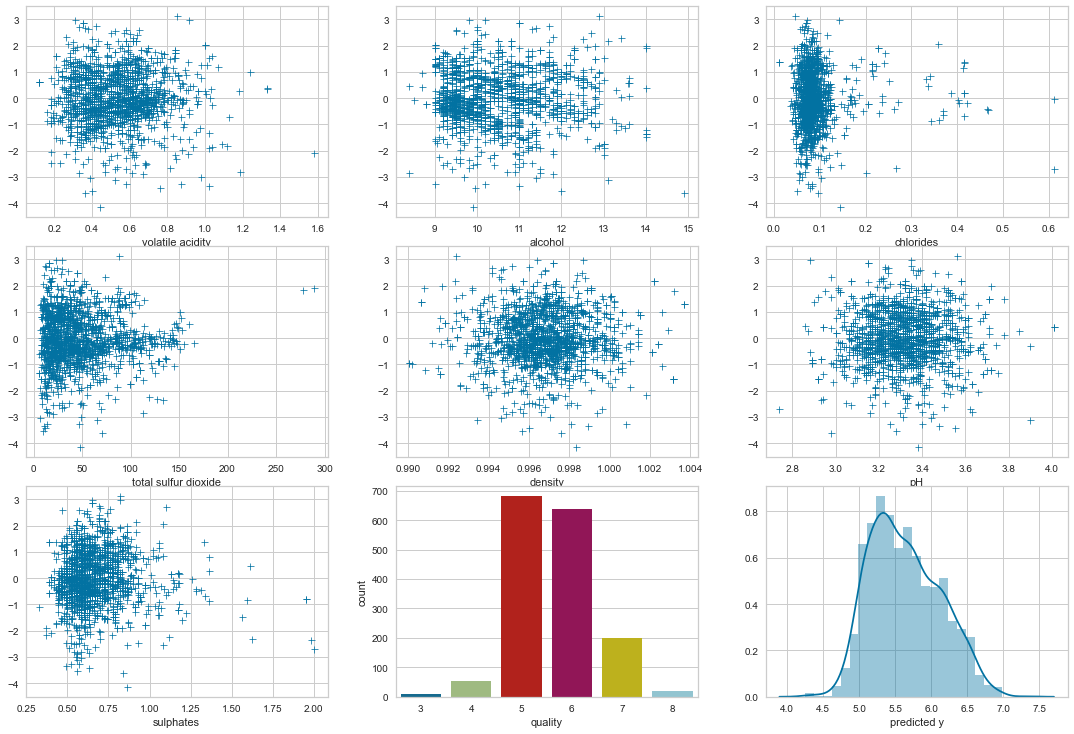

In [46]:
#help(sns.distplot)

fig, axs = plt.subplots(3,3, figsize=(15, 10))
plt.tight_layout(pad=0.5, w_pad=4, h_pad=1.0)  

sns.scatterplot(x=df['volatile acidity'], y=e_s, ax=axs[0,0],marker="+")
sns.scatterplot(x=df.alcohol, y=e_s,ax=axs[0,1],marker="+")
sns.scatterplot(x=df.chlorides, y=e_s, ax=axs[0,2],marker="+")
sns.scatterplot(x=df['total sulfur dioxide'], y=e_s, ax=axs[1,0],marker="+")
sns.scatterplot(x=df.density, y=e_s,ax=axs[1,1],marker="+")
sns.scatterplot(x=df.pH, y=e_s, ax=axs[1,2],marker="+")
sns.scatterplot(x=df.sulphates, y=e_s, ax=axs[2,0],marker="+")
sns.countplot(x=df.quality, ax=axs[2,1])
sns.distplot(y_pred,ax=axs[2,2],axlabel='predicted y')

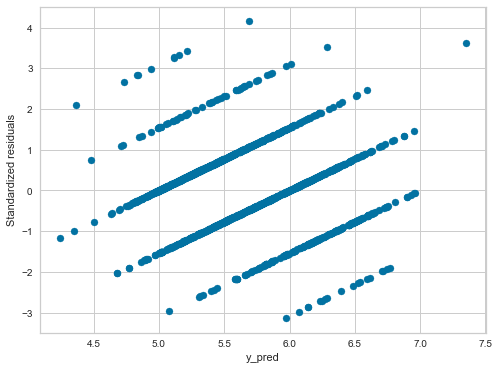

In [47]:
plt.figure(figsize=(8,6))  # not too big
plt.scatter(y_pred, -e_s)
plt.ylabel("Standardized residuals")
plt.xlabel("y_pred")
plt.show()

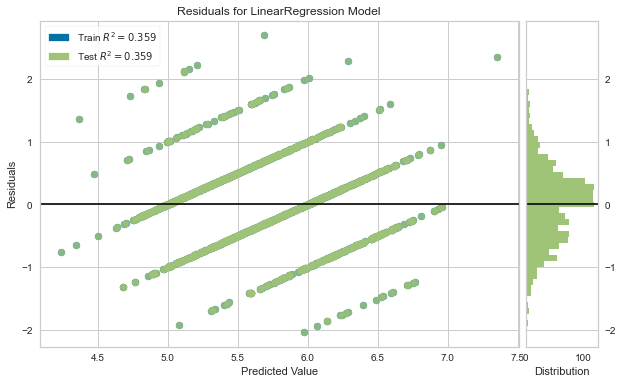

In [54]:
#from solution

from yellowbrick.regressor import residuals_plot
from sklearn.linear_model import LinearRegression
plt.figure(figsize=(10,6))
viz = residuals_plot(LinearRegression(),sm.add_constant( df[features_tuned2]), df.quality)

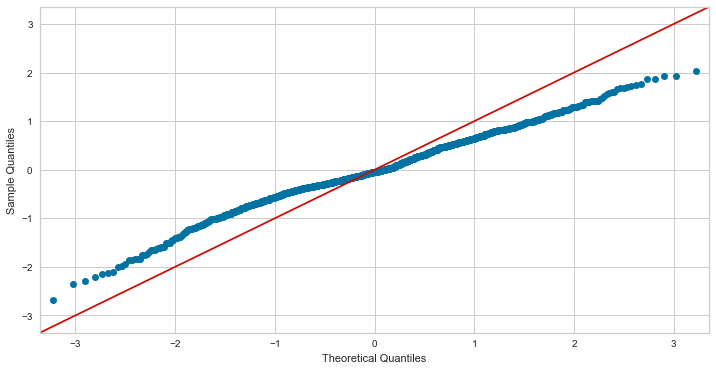

In [81]:
#from yellowbrick.regressor import ResidualsPlot
#help(ResidualsPlot)
#type(model2)
#from sklearn import datasets, linear_model
# Create linear regression object
#reg = LinearRegression().fit(sm.add_constant(df[features_tuned2]), df.quality)

#regr = linear_model.LinearRegression()
#type(reg)
# Train the model using the training sets
#regr.fit(sm.add_constant( df[features_tuned2]), df.quality)
#print('Coefficients: \n', reg.coef_)
#visualizer = ResidualsPlot(reg, hist=False, qqplot=True)
#visualizer.show()

fig = sm.qqplot(results2.resid,line="45" )
plt.show()

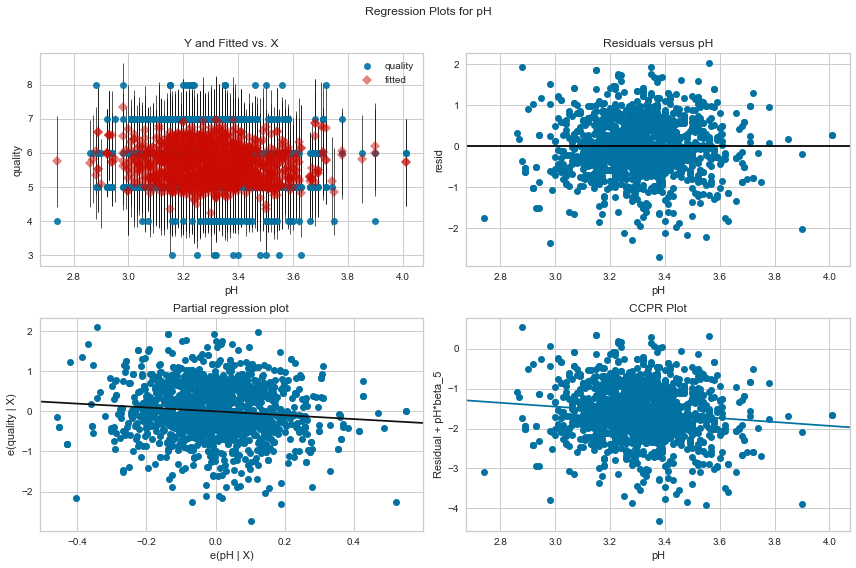

In [57]:
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
#help(sm.graphics.plot_regress_exog)
fig = sm.graphics.plot_regress_exog(results2, 'pH',fig=fig)

In [ ]:
# The CCPR plot provides a way to judge the effect of one regressor on the response variable by taking into account
# the effects of the other independent variables. The partial residuals plot is defined as 
# Residuals+𝐵𝑖𝑋𝑖 versus 𝑋𝑖. The component adds 𝐵𝑖𝑋𝑖 versus 𝑋𝑖 to show where the fitted line would lie. 
# Care should be taken if 𝑋𝑖 is highly correlated with any of the other independent variables. 
# If this is the case, the variance evident in the plot will be an underestimate of the true variance.

**Your comments on the residual plot** 

In general, the purpose of a residual plot is:

 to detect patterns that confirm or reject the suitability of the linear regression model. Examples include unequal variance (heteroscedasticity), auto-correlation. The suitability of linear regression is confirmed if residuals vary randomly around the zero line.

With regard to the above residual plot, I conclude:

 linear regression is actually not a suitable model because our dependent variable is a quality score with distinct values. This inappropriateness is in the below plot, which shows another common variant of the residual plot in which we plot residuals against outcomes. 

# Well done. You did great in solving all the exercises!